In [48]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [58]:
dataset = pd.read_csv("tempo.csv", sep=";")
#visualizar
dataset.head()
#dataset.shape

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [27]:
#Explorar dados categoricos
agrupado = dataset.groupby(["Aparencia"]).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<Axes: xlabel='Aparencia'>

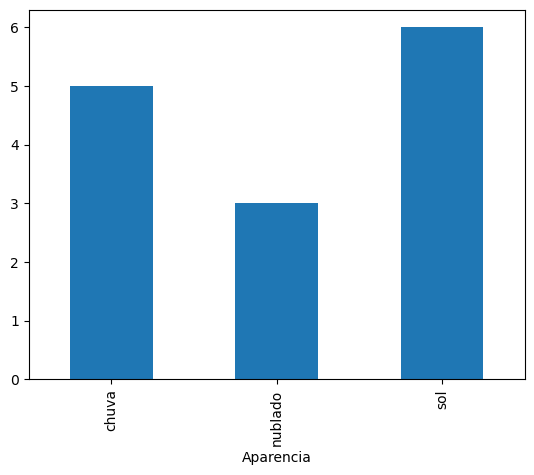

In [28]:
agrupado.plot.bar()

In [91]:
#contar valores nulos
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [30]:
#Alterando 'Menos' pela moda 'Sol'
dataset.loc[dataset["Aparencia"] == "menos"] = "sol"

In [68]:
#temperatura fora do dominio
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [80]:
#visualizar Media
mediana = sts.median(dataset["Umidade"])
mediana

85.25

In [79]:
#substituir NAS pela media
dataset['Umidade'].fillna(mediana, inplace = True)

In [82]:
agrupado = dataset.groupby(["Umidade"]).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19480\640715104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

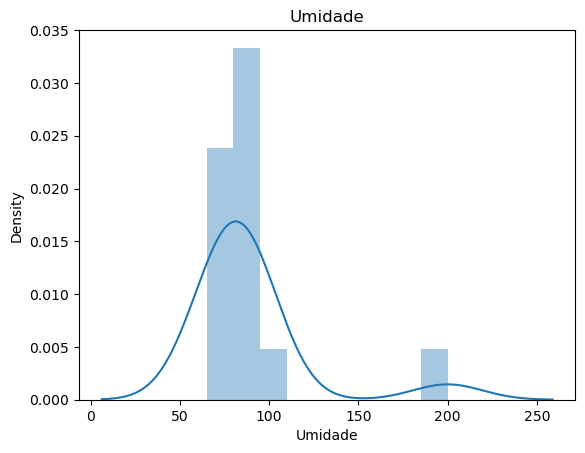

In [85]:
srn.distplot(dataset['Umidade']).set_title('Umidade')

In [90]:
dataset['Vento']

0          FALSO
1     VERDADEIRO
2          FALSO
3          FALSO
4          FALSO
5     VERDADEIRO
6     VERDADEIRO
7          FALSO
8          FALSO
9          FALSO
10    VERDADEIRO
11    VERDADEIRO
12         FALSO
13    VERDADEIRO
Name: Vento, dtype: object

In [104]:
dataset['Vento'].fillna('FALSO', inplace = True)

In [105]:
dataset['Temperatura'].describe()

count    14.000000
mean     74.517857
std       7.247323
min      64.000000
25%      69.250000
50%      73.500000
75%      80.750000
max      85.250000
Name: Temperatura, dtype: float64

In [106]:
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [107]:
dataset['Temperatura']

0     85.00
1     80.00
2     83.00
3     70.00
4     68.00
5     65.00
6     64.00
7     85.25
8     69.00
9     75.00
10    75.00
11    72.00
12    81.00
13    71.00
Name: Temperatura, dtype: float64

In [108]:
dataset['Jogar']

0     nao
1     nao
2     sim
3     sim
4     sim
5     nao
6     sim
7     nao
8     sim
9     sim
10    sim
11    sim
12    sim
13    nao
Name: Jogar, dtype: object